
# Audio Formats
*   mp3
*   flac
*   wav



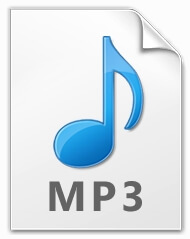

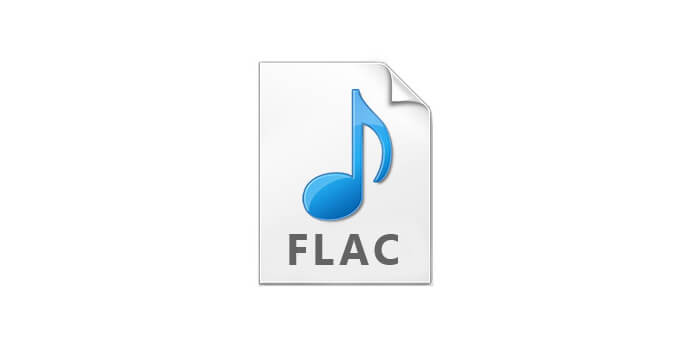

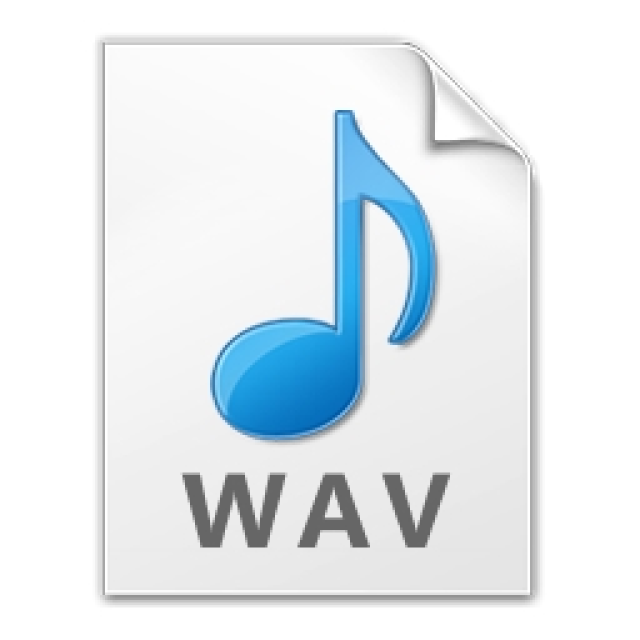

# Audio Signal Parameters
* number of channels
* sample width (Bytes)
* framerate / sample rate (44100 KHz)
* number of frames 
* value of frames

In [2]:
import wave

In [3]:
obj = wave.open('test.wav','rb')

In [4]:
obj

In [6]:
obj.getnchannels()

2

In [7]:
obj.getsampwidth()

2

In [8]:
obj.getframerate()

44100

In [9]:
obj.getnframes()

308700

In [10]:
obj.getparams()

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=308700, comptype='NONE', compname='not compressed')

In [11]:
time_audio = obj.getnframes()/obj.getframerate()

In [12]:
time_audio

7.0

In [14]:
frames = obj.readframes(-1)

In [15]:
frames

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [16]:
len(frames)

1234800

In [19]:
(len(frames)/obj.getsampwidth())/obj.getnchannels()

308700.0

In [20]:
obj.getnframes()

308700

In [21]:
type(frames)

bytes

In [22]:
type(frames[0])

int

In [23]:
frames[0]

0

In [25]:
frames[40000]

230

In [26]:
new_obj = wave.open('new_audio.wav','wb')
new_obj.setframerate(44100)
new_obj.setsampwidth(2)
new_obj.setnchannels(2)
new_obj.writeframes(frames)

In [27]:
new_obj.close()

In [29]:
new_obj2 = wave.open('new_audio2.wav','wb')
new_obj2.setframerate(32000)
new_obj2.setsampwidth(2)
new_obj2.setnchannels(2)
new_obj2.writeframes(frames)
new_obj2.close()

In [30]:
new_obj3 = wave.open('new_audio3.wav','wb')
new_obj3.setframerate(64000)
new_obj3.setsampwidth(2)
new_obj3.setnchannels(2)
new_obj3.writeframes(frames)
new_obj3.close()

In [31]:
new_obj4 = wave.open('new_audio4.wav','wb')
new_obj4.setframerate(44100)
new_obj4.setsampwidth(2)
new_obj4.setnchannels(1)
new_obj4.writeframes(frames)
new_obj4.close()

In [32]:
new_obj5 = wave.open('new_audio5.wav','wb')
new_obj5.setframerate(44100)
new_obj5.setsampwidth(1)
new_obj5.setnchannels(2)
new_obj5.writeframes(frames)
new_obj5.close()

In [42]:
import numpy as np

In [43]:
signal_array = np.frombuffer(frames,dtype=np.int16)

In [44]:
signal_array

array([   0,    0,    0, ..., 1421, 1475, 1457], dtype=int16)

In [45]:
signal_array.shape

(617400,)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

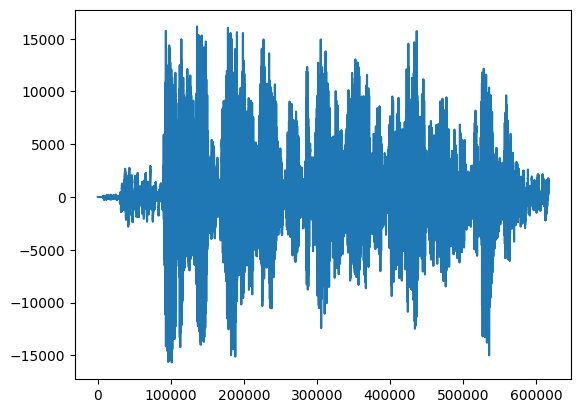

In [56]:
plt.plot(signal_array)

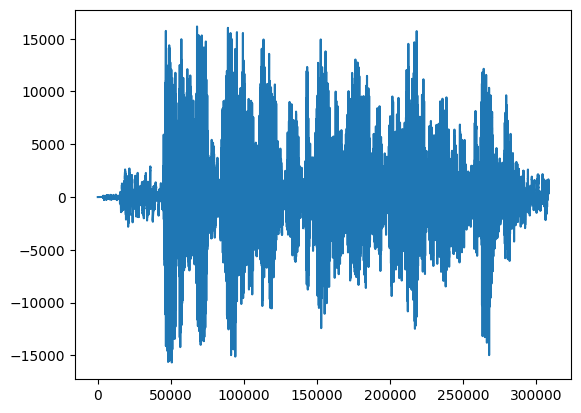

In [57]:
plt.plot(signal_array[::2])

In [58]:
new_obj6 = wave.open('new_audio6.wav','wb')
new_obj6.setframerate(44100)
new_obj6.setsampwidth(2)
new_obj6.setnchannels(1)
new_obj6.writeframes(signal_array[::2].tobytes())
new_obj6.close()

In [59]:
new_obj7 = wave.open('new_audio7.wav','wb')
new_obj7.setframerate(22050)
new_obj7.setsampwidth(2)
new_obj7.setnchannels(1)
new_obj7.writeframes(signal_array[::4].tobytes())
new_obj7.close()

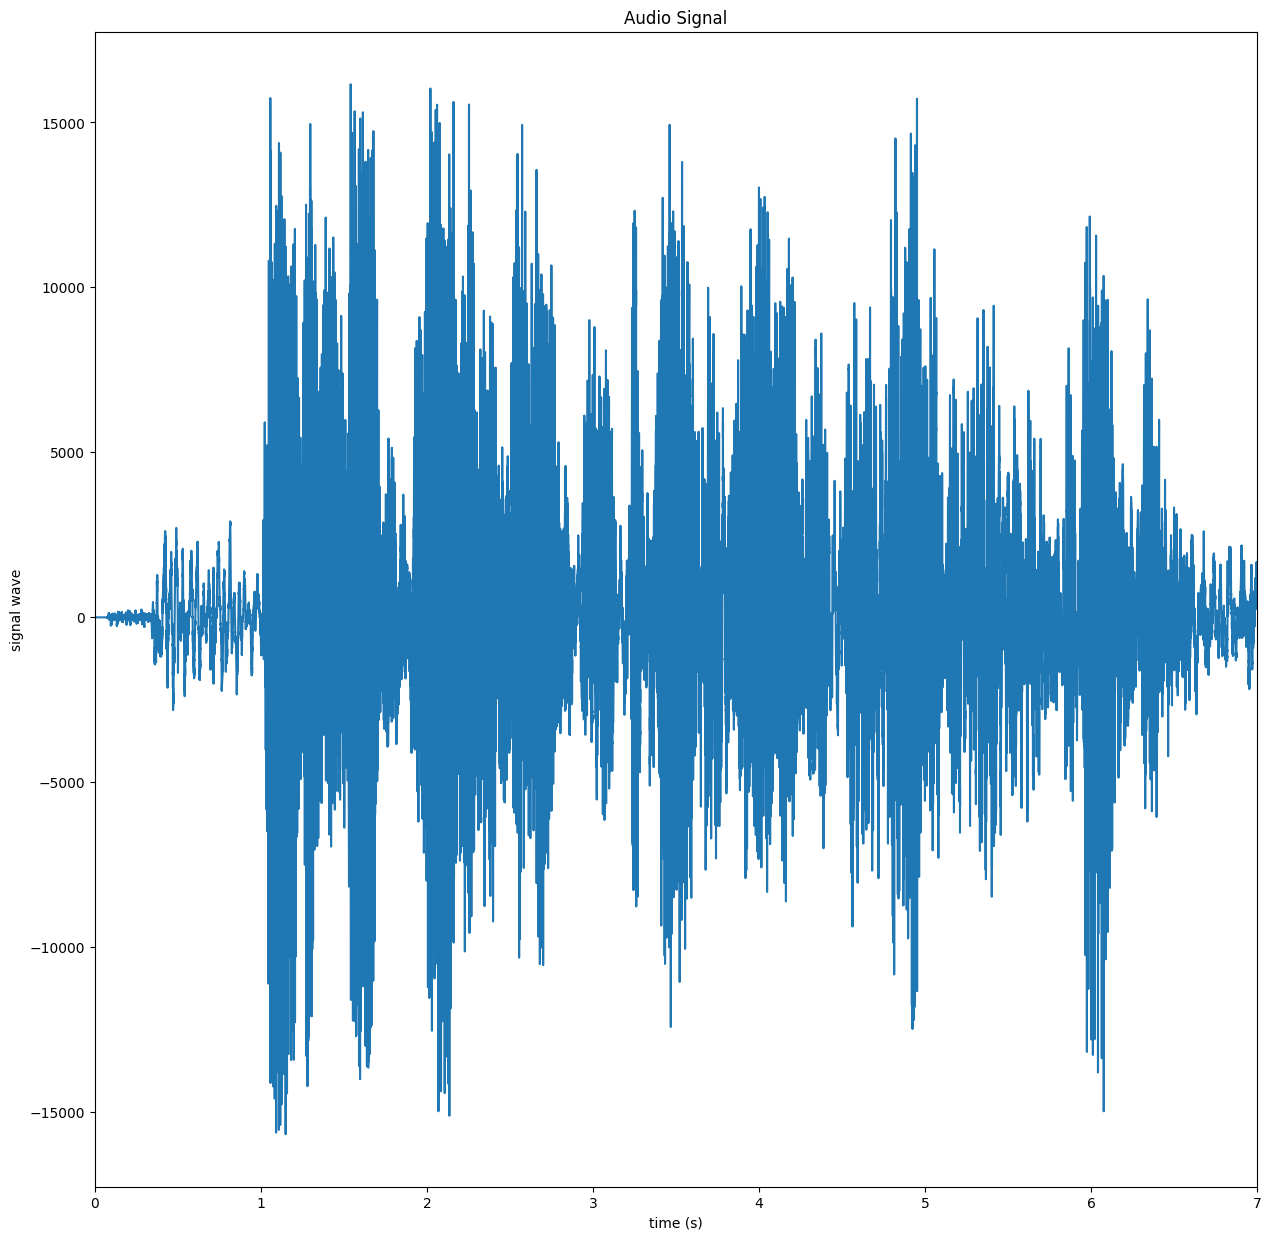

In [60]:
data = signal_array[::2]
times = np.linspace(0,time_audio,num=obj.getnframes())
plt.figure(figsize=(15,15))
plt.plot(times,data)
plt.title('Audio Signal')
plt.ylabel('signal wave')
plt.xlabel('time (s)')
plt.xlim(0,time_audio)
plt.show()

In [62]:
new_obj8 = wave.open('new_audio8.wav','wb')
new_obj8.setframerate(44100)
new_obj8.setsampwidth(2)
new_obj8.setnchannels(2)
new_obj8.writeframes((signal_array*2).tobytes())
new_obj8.close()